In [29]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# loading the boston datasets - 1970 study
boston = load_boston()
boston.keys()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [31]:
boston.data.shape # (Rows - 506, Columns - 13)

(506, 13)

In [32]:
print(boston.feature_names) #Feature Names of Dataset
print('\n' + boston.DESCR) #Dataset Description

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hi

Median Value represents the TARGET.

In [33]:
X = pd.DataFrame(data = boston.data, columns= boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
y = pd.DataFrame({"Median_value": boston.target})
y.head()

,Median_value
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [35]:
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# perform exploratory data anaysis

In [36]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<AxesSubplot:>

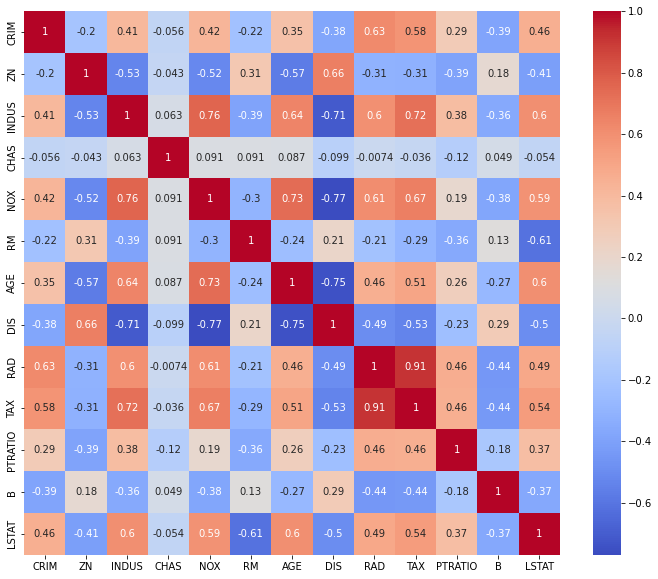

In [37]:
import seaborn as sns
plt.figure(figsize= (12,10))

#checking attributes correlations to find any useful relationship
sns.heatmap(X.corr(), annot= True, cmap="coolwarm") 

<AxesSubplot:xlabel='Median_value', ylabel='Count'>

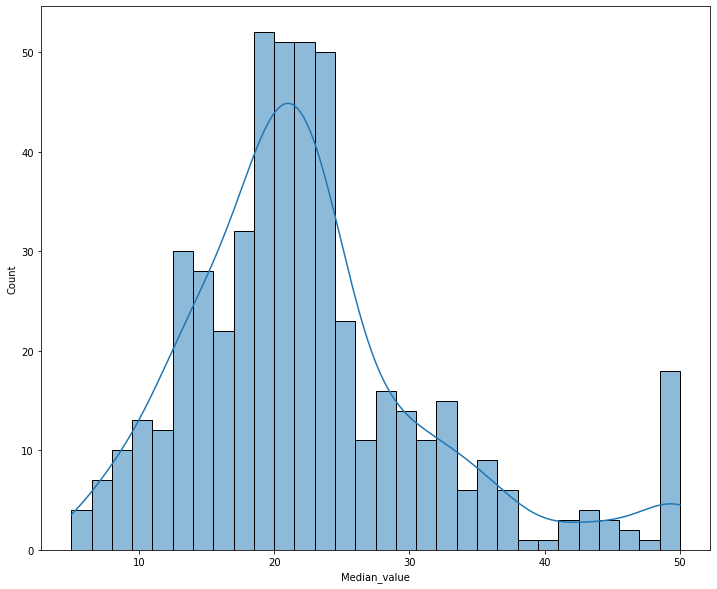

In [38]:
plt.figure(figsize= (12, 10))

sns.histplot(y["Median_value"], kde= True, bins=30)

Most of the prices or median value resides withnin the range of 19 to 24.5

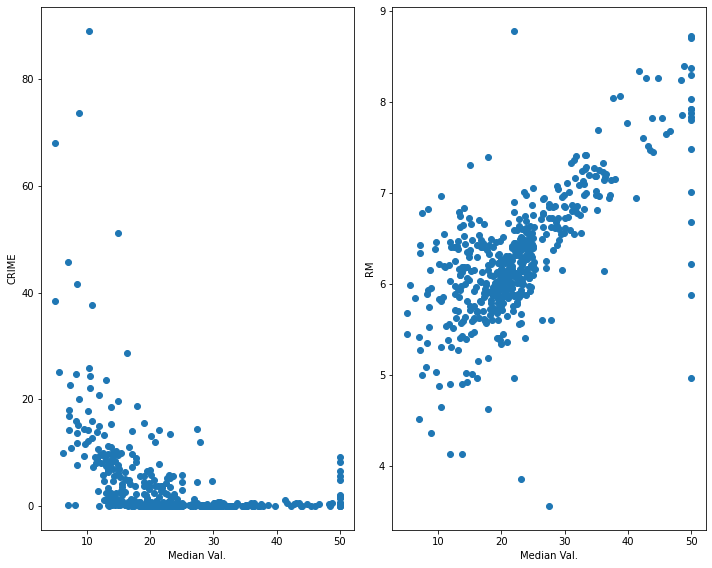

In [39]:
# ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
#  'B' 'LSTAT']
fig, ax = plt.subplots(nrows=1, ncols=2,figsize= (10,8))

ax[0].scatter(y, X.CRIM)
ax[0].set_xlabel("Median Val.")
ax[0].set_ylabel("CRIME")

ax[1].scatter(y, X.RM)
ax[1].set_xlabel("Median Val.")
ax[1].set_ylabel("RM")

plt.tight_layout()

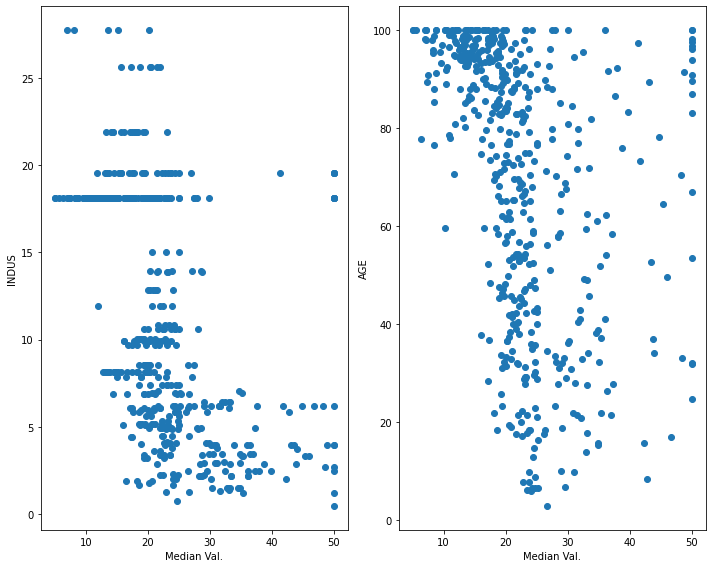

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (10, 8))
ax[0].scatter(y, X.INDUS)
ax[0].set_xlabel("Median Val.")
ax[0].set_ylabel("INDUS")

ax[1].scatter(y, X.AGE)
ax[1].set_xlabel("Median Val.")
ax[1].set_ylabel("AGE")


plt.tight_layout()

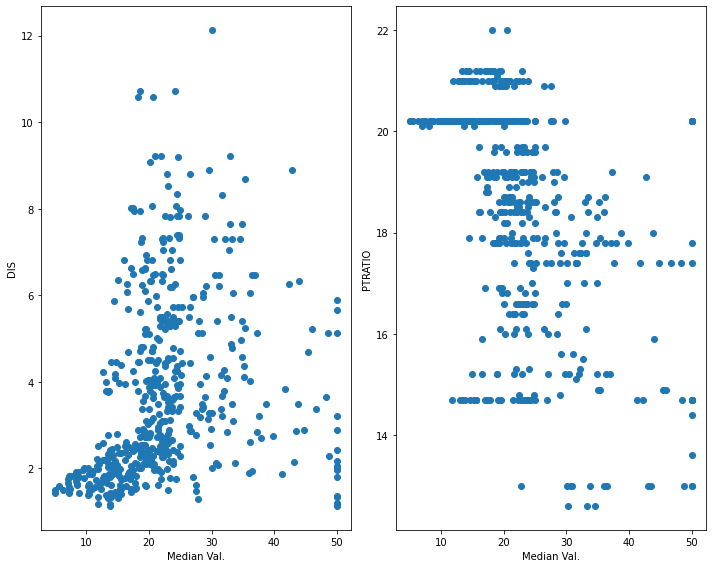

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (10, 8))

ax[0].scatter(y, X.DIS)
ax[0].set_xlabel("Median Val.")
ax[0].set_ylabel("DIS") 

ax[1].scatter(y, X.PTRATIO)
ax[1].set_xlabel("Median Val.")
ax[1].set_ylabel("PTRATIO") 

plt.tight_layout()

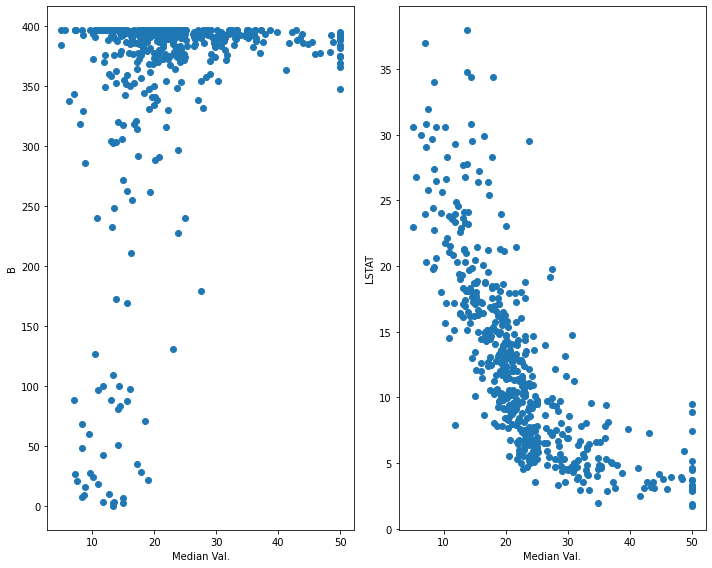

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (10, 8))

ax[0].scatter(y, X.B)
ax[0].set_xlabel("Median Val.")
ax[0].set_ylabel("B")

ax[1].scatter(y, X.LSTAT)
ax[1].set_xlabel("Median Val.")
ax[1].set_ylabel("LSTAT")

plt.tight_layout()

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [44]:
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

#Initiating the SCALER methods.
scaler = StandardScaler() 

#fitting scaler.
scaler.fit(X_train)

#Transform both training & testing datasets.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
#Defining Models
models = {"Elastic_Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
          "Linear_Reg": LinearRegression(),
          "Lasso_1": Lasso(alpha=0.1),
          "Lasso_2": Lasso(alpha=0.2),
          "Ridge_1": Ridge(alpha=0.1),
          "Ridge_2": Ridge(alpha=0.2)}

In [46]:
#fit models to training data.
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

In [47]:
#Evaluate model on testing set.
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    print(f"NAME:{name} - MAE:{mae:.2f} - MSE:{mse:.2f} - R-squared:{R2_score:.2f}")

#getting coefficient of models.
model_coefficients = {}
for name, model in models.items():
    model_coefficients[name] = model.coef_.flatten() #flatten for 1D-array

#Dataframe for models coefficients.
coefficient_df = pd.DataFrame(data=model_coefficients, index= X.columns)
coefficient_df

NAME:Elastic_Net - MAE:3.17 - MSE:21.51 - R-squared:0.71
NAME:Linear_Reg - MAE:3.19 - MSE:20.75 - R-squared:0.72
NAME:Lasso_1 - MAE:3.22 - MSE:21.79 - R-squared:0.71
NAME:Lasso_2 - MAE:3.24 - MSE:22.45 - R-squared:0.70
NAME:Ridge_1 - MAE:3.19 - MSE:20.75 - R-squared:0.72
NAME:Ridge_2 - MAE:3.19 - MSE:20.75 - R-squared:0.72


,Elastic_Net,Linear_Reg,Lasso_1,Lasso_2,Ridge_1,Ridge_2
CRIM,-0.738878,-1.010209,-0.693319,-0.426558,-1.008779,-1.007359
ZN,0.521890,0.909351,0.487620,0.248931,0.906906,0.904479
INDUS,-0.036475,0.237117,-0.000000,-0.000000,0.234256,0.231421
CHAS,0.930424,0.886073,0.893188,0.846354,0.886675,0.887272
NOX,-1.248579,-1.884294,-1.411468,-0.861171,-1.880262,-1.876248
RM,2.906616,2.810128,2.917379,2.949576,2.810947,2.811757
AGE,-0.389820,-0.494882,-0.308858,-0.094217,-0.494879,-0.494872
DIS,-2.320004,-3.279619,-2.465749,-1.687485,-3.274619,-3.269637
RAD,0.718231,2.051920,0.451180,0.000000,2.042784,2.033732
TAX,-0.355668,-1.353986,-0.000000,-0.000000,-1.346225,-1.338551


When we evaluate each of the MAE of the models, we find that Elastic Net stands out.
Having the lowest Absolute Error.
Also considering its R-squared value: Its shows Elastic Net can only explain 71-percent of variation in the target variable.

<AxesSubplot:>

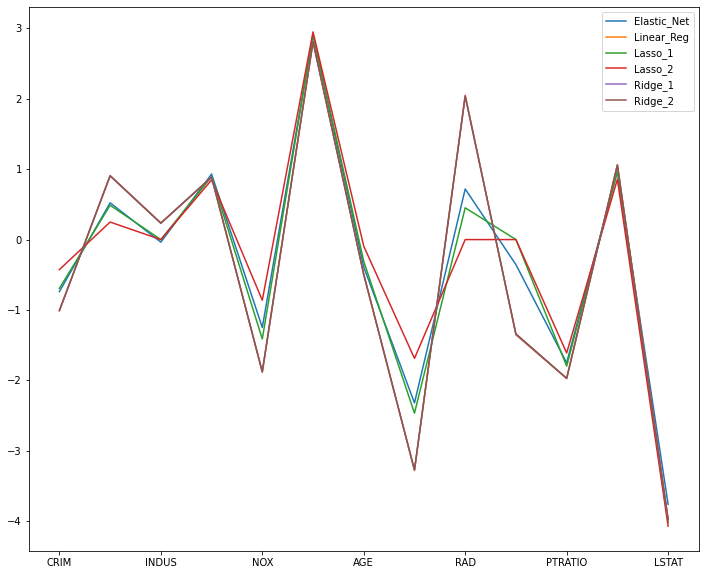

In [48]:
#plots of each predicted value
coefficient_df.plot(figsize=(12,10))

# Model Prediction.

In [49]:
prediction_dict = {}
for name, model in models.items():
    prediction_dict[name] = model.predict(X_test_scaled).flatten()

print(prediction_dict)

{'Elastic_Net': array([27.99255432, 35.6282676 , 17.28723746, 25.44700375, 18.61953198,
       23.1732826 , 17.76447954, 14.79614069, 21.9699943 , 20.95388039,
       24.31805658, 18.97669861, -4.9370867 , 22.19353325, 19.45073233,
       25.38102726, 18.94156415,  5.88509136, 38.91693997, 17.47076883,
       26.94691867, 29.12501732, 11.9710644 , 24.30974303, 17.81093563,
       15.29758352, 23.33706086, 14.88454907, 22.46433657, 19.84306031,
       21.69680845, 25.24470807, 24.89314569, 18.27976393, 15.95108637,
       18.30990254, 30.81164138, 20.47619127, 24.17815526, 24.97901687,
       14.64393056, 30.2069819 , 40.34700386, 18.49314445, 26.95059606,
       16.83528311, 14.57836794, 26.1666546 , 19.5960146 , 30.2751538 ,
       21.53474978, 32.99019967, 16.39443581, 26.44005122, 37.99085529,
       22.49921551, 18.715373  , 31.7094371 , 24.90944136, 13.73949973,
       22.98013307, 30.1869211 , 30.81928562, 17.13482807, 22.97615808,
       16.89348509, 19.92344852, 26.04259148, 30

In [50]:
df_predict = pd.DataFrame(data= prediction_dict)

#Initiating the Actual Prices to Dataframe.
df_predict["Actual"] = y_test

#Saving File as predicted_price
df_predict.to_csv("predicted_price", index= False)

# prediction_dict.keys()
df_predict

,Elastic_Net,Linear_Reg,Lasso_1,Lasso_2,Ridge_1,Ridge_2,Actual
0,27.992554,28.609523,28.202624,27.795621,28.606522,28.603527,24.0
1,35.628268,36.856268,35.616459,34.644697,36.850330,36.844419,NaN
2,17.287237,15.388769,18.101195,18.249887,15.401486,15.414062,34.7
3,25.447004,25.644527,25.543935,25.339577,25.643381,25.642234,33.4
4,18.619532,18.724063,18.537311,18.459269,18.723469,18.722882,NaN
...,...,...,...,...,...,...,...
173,32.765672,33.319090,33.462763,33.293033,33.314964,33.310841,23.6
174,21.982480,22.754307,22.093137,21.427905,22.749655,22.745028,NaN
175,20.685405,20.501803,20.867121,20.533530,20.504131,20.506422,29.4
176,25.390058,25.406461,25.791711,25.456452,25.407494,25.408491,23.2


# Linearity Plot

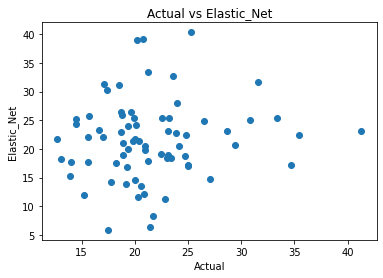

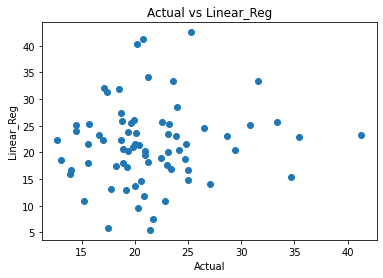

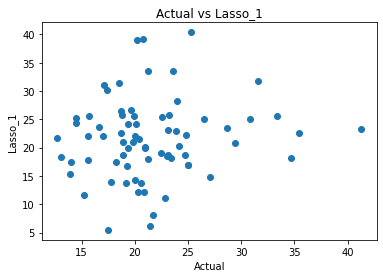

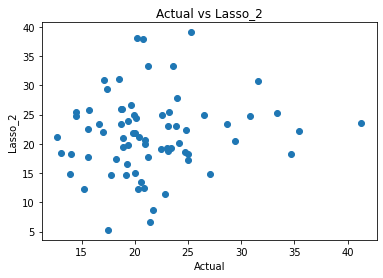

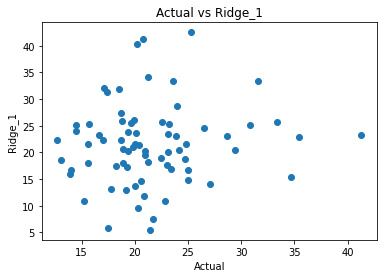

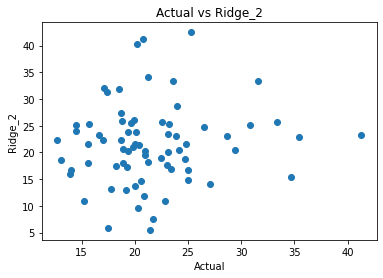

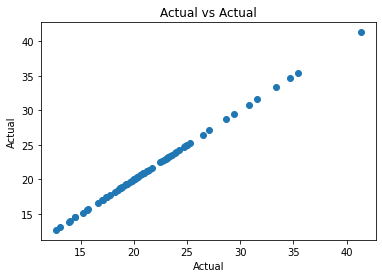

In [54]:
#plotting each model against the actual price to evaluate linearity of model.
for model_name in df_predict[:-1]:
    plt.scatter(df_predict["Actual"], df_predict[model_name])
    plt.xlabel("Actual")
    plt.ylabel(f"{model_name.title()}")
    plt.title(f"Actual vs {model_name}")
    plt.show()


# Residual Plot

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


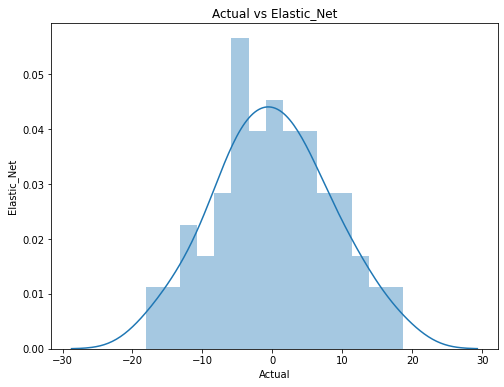

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


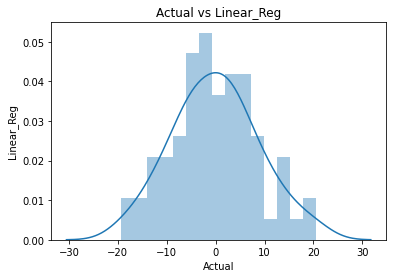

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


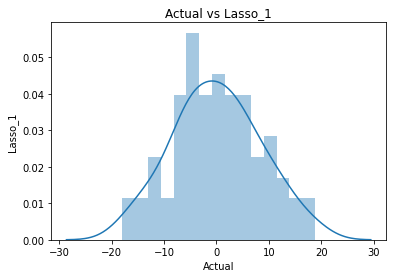

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


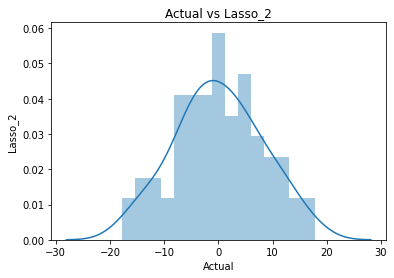

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


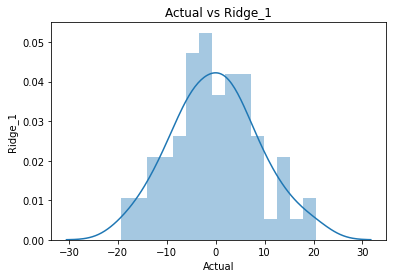

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


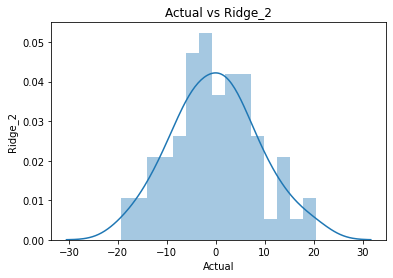

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


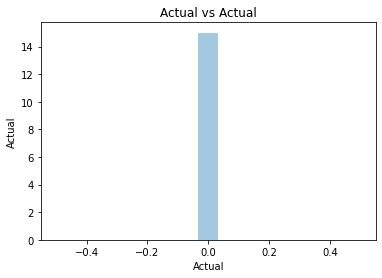

In [71]:
plt.figure(figsize= (8,6))
for model_name in df_predict[:-1]:
    sns.distplot((df_predict[model_name] - df_predict['Actual']), kde= True, bins= 15)
    plt.xlabel("Actual")
    plt.ylabel(f"{model_name.title()}")
    plt.title(f"Actual vs {model_name}")
    plt.show()
